Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Read the column description and ensure you understand each attribute well
Study the data distribution in each attribute, share your findings. (5 points)
Get the target column distribution. Your comments
Split the data into training and test set in the ratio of 70:30 respectively
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
Print the confusion matrix for all the above models (5 points)
 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling-1.csvView in a new window

Column description: TheraBank_Column_Description.xlsxView in a new window

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

For Ex - Supervised Learning_R4_Project2_Thera Bank.ipynb

1. Study the data distribution in each attribute, share your findings. (5 points)

In [67]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pal = sns.hls_palette(10, h = .5)
sns.set_palette(pal)

In [2]:
bdata=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [26]:
bdata.shape

(5000, 14)

In [23]:
#checking Nulls
bdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [22]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [24]:
bdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [27]:
#remove unwanted variables like Zipcode and ID. 
bdata = bdata.drop('ID', axis=1)

In [28]:
bdata = bdata.drop('ZIP Code', axis=1)

In [30]:
bdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


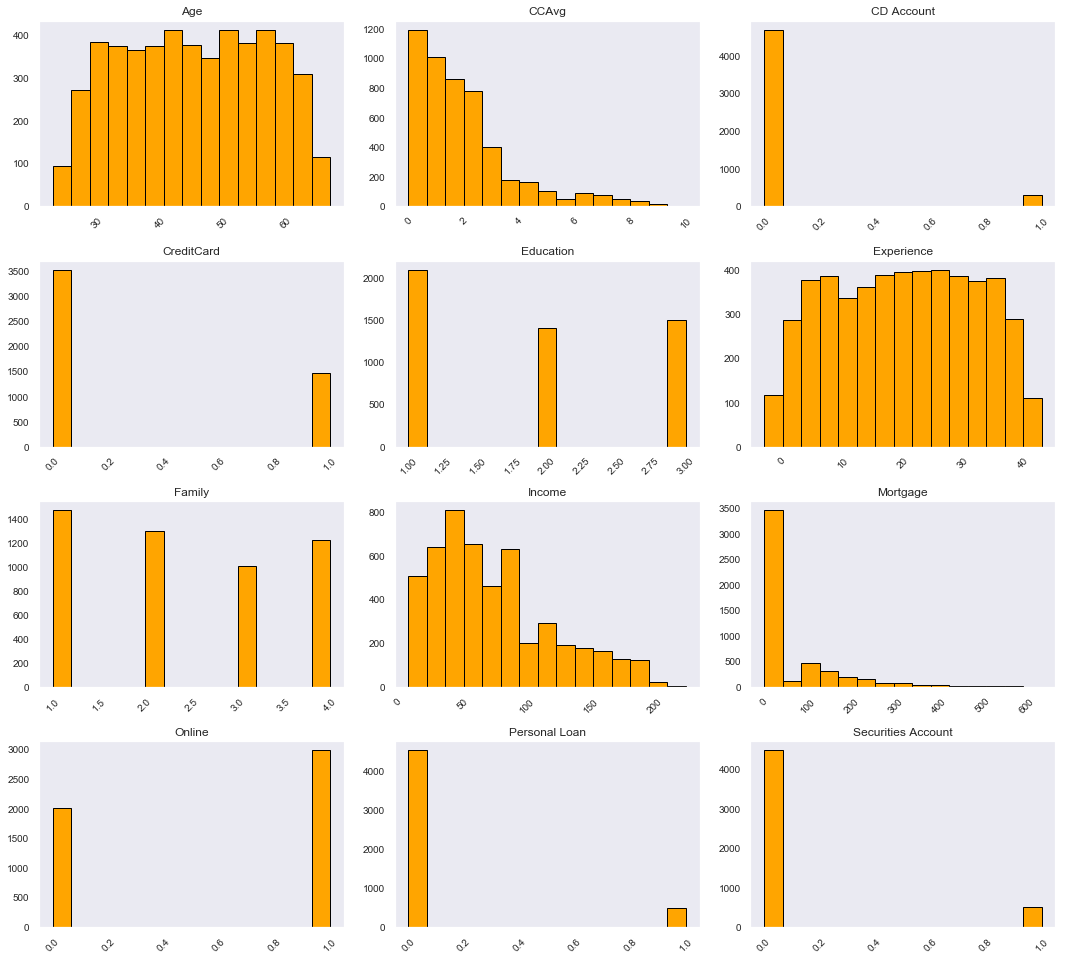

In [59]:
fig = bdata.hist(bins=15,
                 color='orange',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

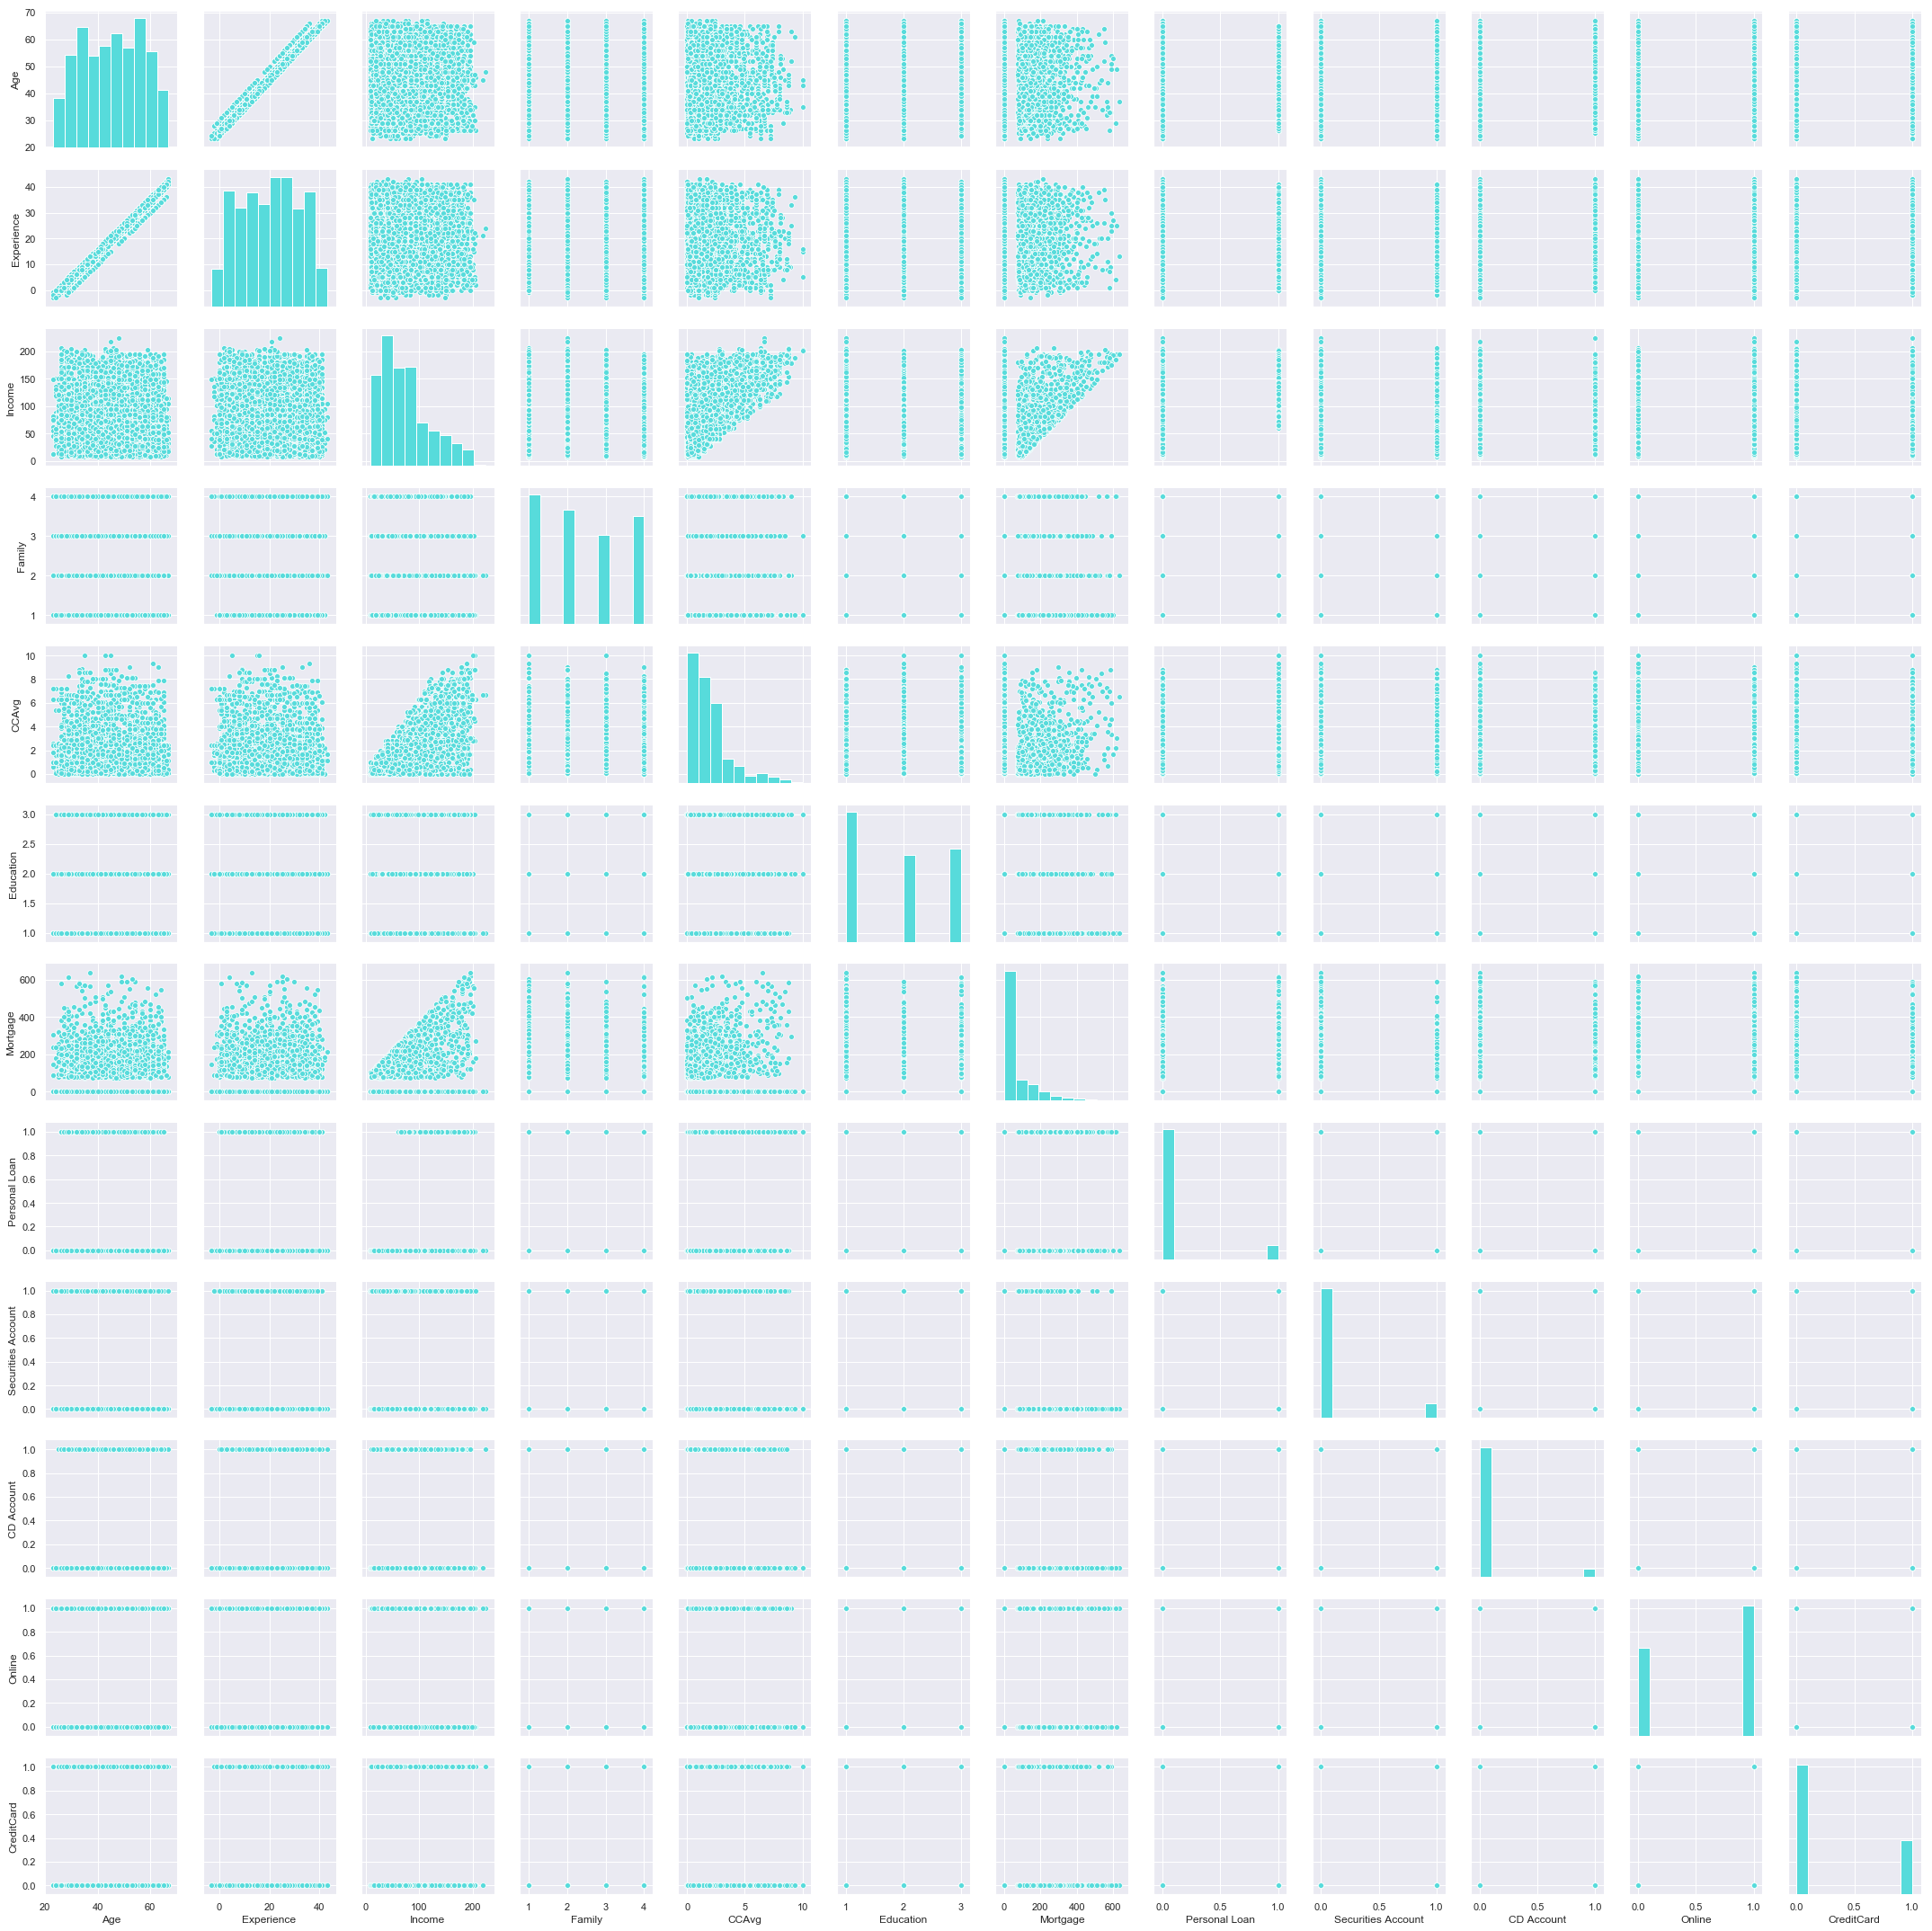

In [35]:
sns.pairplot(bdata)

In [50]:
corr = t2.corr()
corr.style.background_gradient()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1,0.994215,-0.0552686,-0.0464177,-0.0520122,0.0413344,-0.0125386,-0.00772562,-0.000436242,0.00804255,0.0137024,0.00768104
Experience,0.994215,1,-0.0465742,-0.0525631,-0.0500765,0.0131518,-0.0105816,-0.0074131,-0.00123213,0.0103533,0.0138979,0.00896745
Income,-0.0552686,-0.0465742,1,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.0026165,0.169738,0.0142059,-0.00238501
Family,-0.0464177,-0.0525631,-0.157501,1,-0.109275,0.0649289,-0.0204449,0.061367,0.0199941,0.0141104,0.010354,0.0115881
CCAvg,-0.0520122,-0.0500765,0.645984,-0.109275,1,-0.136124,0.109905,0.366889,0.0150863,0.136534,-0.00361101,-0.00668949
Education,0.0413344,0.0131518,-0.187524,0.0649289,-0.136124,1,-0.0333271,0.136722,-0.010812,0.0139339,-0.0150038,-0.0110141
Mortgage,-0.0125386,-0.0105816,0.206806,-0.0204449,0.109905,-0.0333271,1,0.142095,-0.00541097,0.0893111,-0.0059949,-0.00723092
Personal Loan,-0.00772562,-0.0074131,0.502462,0.061367,0.366889,0.136722,0.142095,1,0.0219539,0.316355,0.00627782,0.00280151
Securities Account,-0.000436242,-0.00123213,-0.0026165,0.0199941,0.0150863,-0.010812,-0.00541097,0.0219539,1,0.317034,0.0126275,-0.0150283
CD Account,0.00804255,0.0103533,0.169738,0.0141104,0.136534,0.0139339,0.0893111,0.316355,0.317034,1,0.17588,0.278644


Observation on data

Ignore following variables
    ID, Zip Code
Findings:
    Income and CCAvg are well correlated(0.646)
    Income and Personal Load are fairly correlated(0.5)


Get the target column distribution. Your comments Split the data into training and test set in the ratio of 70:30 respectively 
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying
personal loans (15 points)
Print the confusion matrix for all the above models (5 points)

DATA Management

In [54]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


Train and Test Data

In [56]:
X = bdata.drop(['Personal Loan'], axis=1)
Y = bdata['Personal Loan']

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [61]:
X_Train_scaled = zscore(xtrain)
X_Test_scaled = zscore(xtest)

In [62]:
X_Train_scaled.shape

(3500, 11)

Prediction Models - KNN

In [159]:
KNN = KNeighborsClassifier(algorithm= 'auto',
 leaf_size= 10,
 metric= 'minkowski',
 n_neighbors= 5,
 weights='distance')

In [160]:
KNN.fit(X_Train_scaled, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [161]:
predicted_labels = KNN.predict(X_Test_scaled)

In [162]:
accuracy_score = metrics.accuracy_score(ytest, predicted_labels)
accuracy_score

0.9533333333333334

In [163]:
# Compute and print AUC score
from sklearn.metrics import roc_auc_score
h_auc = roc_auc_score(bdata["Personal Loan"],bdata["Income"])
h_auc

0.922066279498525

In [164]:
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV 
gsknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)

gsknn_fit = gsknn.fit(X_Train_scaled, ytrain)          
y_pred_knn = gsknn_fit.predict(X_Test_scaled)

## best parameter
print(gsknn.best_params_)

## best estimator
print("KNN parameters: \n", gsknn_fit.best_estimator_)

## best score
print("Best score: ", gsknn.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gsknn.score(xtrain, ytrain))

## The overall accuracy on the test set:
print("Test accuracy: ", gsknn.score(xtest, ytest))

{'n_neighbors': 1, 'weights': 'uniform'}
KNN parameters: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
Best score:  0.9611428571428572
Training score:  0.18428571428571427
Test accuracy:  0.19266666666666668


In [116]:
accuracy = sum(y_pred_knn == ytest)/len(ytest)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(metrics.classification_report(ytest, y_pred_knn))


The predictive accuracy is:  0.95
The classification error is:  0.05
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.80      0.65      0.72       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [115]:
metrics.confusion_matrix(ytest,predicted_labels)

array([[1344,    7],
       [  63,   86]], dtype=int64)

In [118]:
# Cross Validation for KNN model
from sklearn.model_selection import cross_val_score
scores_knn =cross_val_score(gsknn, xtrain, ytrain, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_knn), np.std(scores_knn)))

CV accuracy: 0.905 +/- 0.009


Prediction Models - Logistic Regression

In [120]:
# Use GridSearch to find the best logistic regression parameters, and fit the training data to apply to test data.

from sklearn.linear_model import LogisticRegression 

gslr = GridSearchCV(estimator=LogisticRegression(random_state=0),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)

gslr_fit = gslr.fit(xtrain, ytrain)          
y_pred_lr = gslr_fit.predict(xtest)

## best parameter
print(gslr.best_params_)

## best estimator
print("Logistic parameters: \n", gslr_fit.best_estimator_)

## best score
print("Best score: ", gslr.best_score_)

## The overall accuracy on the training set:
print("Training score: ", gslr.score(xtrain, ytrain))

## The overall accuracy on the test set:
print("Test accuracy: ", gslr.score(xtest, ytest))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

{'C': 1000, 'penalty': 'l2'}
Logistic parameters: 
 LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Best score:  0.952
Training score:  0.9528571428571428
Test accuracy:  0.9473333333333334


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
# Generalization Performance of logistic regression on test data

accuracy = sum(y_pred_lr == ytest)/len(ytest)
error = 1 - accuracy
print("The predictive accuracy is: ", round(accuracy, 2))
print("The classification error is: ", round(error, 2))
print(metrics.classification_report(ytest, y_pred_lr))


The predictive accuracy is:  0.95
The classification error is:  0.05
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [142]:
# Confusion matrix
metrics.confusion_matrix(ytest, predicted_labels)

array([[1344,    7],
       [  63,   86]], dtype=int64)

In [153]:
# Cross validation performance for logistic regression 

#scores_lr =cross_val_score(gslr, xtrain, ytrain,scoring='accuracy', cv=10)
#print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_lr),np.std(scores_knn)))

Prediction Models - Naive Bayes

In [154]:
# Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [155]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [157]:
# make predictions
expected = ytest
predicted = model.predict(xtest)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500

[[1228  123]
 [  65   84]]


Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [ ]:
KNN - test accuracy - 19%
Logistics - 96%
Naive Bayes - 95%

Logistics and Naive Bayes  models are giving accuracy in close range(95-96%)
Naive Bayes can be used, Logistics seems overfit